In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import poisson

In [2]:
def find_lambda_sup(lambda_t, T, step=0.001):
    t = np.arange(0, T, step)
    lamb = [lambda_t(x) for x in t]
    return max(lamb)


def przezedzanie(lambda_t, T, step=0.001):
    lamb = find_lambda_sup(lambda_t, T, step=step)
    S = []
    t = 0
    I = 0
    while True:
        u_1 = np.random.uniform(0, 1)
        t = t - np.log(u_1) / lamb
        if t > T:
            return S
        else:
            u_2 = np.random.uniform(0, 1)
            if u_2 <= lambda_t(t) / lamb:
                I += 1
                S.append(t)

In [3]:
def f_1(t):
    return 1 / (t + 1)

def f_2(t):
    return np.exp(-t)

def integral(t):
    return (- np.exp(-t) + 1 + np.log(t+1))

In [6]:
N = np.zeros(1000)
for i in range(1000):
    S_1 = przezedzanie(f_1, 10)
    S_2 = przezedzanie(f_2, 10)
    N[i] = len(S_1) + len(S_2)

/home/aga/miniconda3/envs/symulacje/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


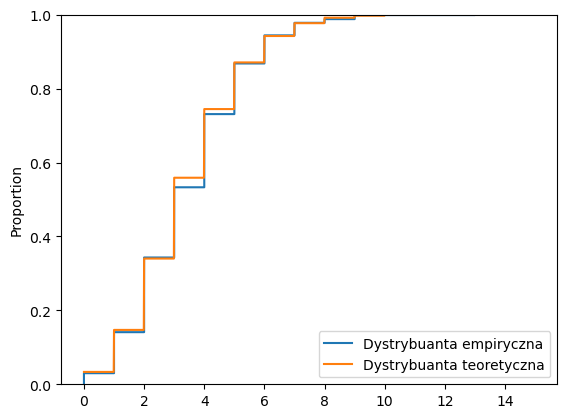

In [7]:
t = np.arange(0, 15, 0.01)

sns.ecdfplot(N, label="Dystrybuanta empiryczna")
plt.plot(t, poisson.cdf(t, integral(10)), label="Dystrybuanta teoretyczna")
plt.legend()